## EN2550: Assignment 03 on Object Counting on a Conveyor Belt

Name - Wanigarathna A.D.

Index - 190660F

### Connected Component Analysis


In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

1) **Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.**

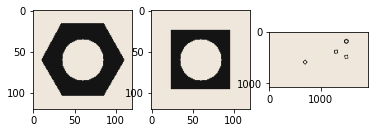

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

**Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images**

Thershold value for hexnut_template = 129.0
Thershold value for squarenut_template = 130.0
Thershold value for conveyor_f100 = 134.0


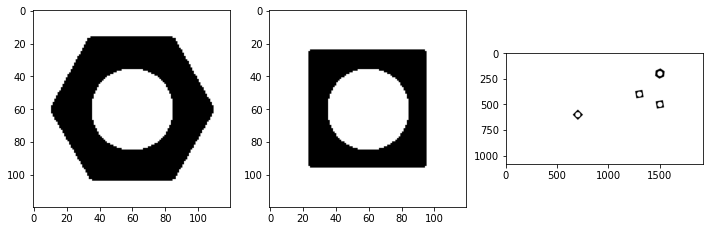

In [18]:
# Your code here.

grayImages,blurredImages,binarized,threshold_values = [],[],[],[]
images = [hexnut_template, squarenut_template, conveyor_f100]
image_names = ["hexnut_template", "squarenut_template", "conveyor_f100"]


for i in range(3):
    grayImages.append(cv.cvtColor(images[i], cv.COLOR_BGR2GRAY))


for i in range(3):
    blurredImages.append(cv.GaussianBlur(grayImages[i], (9,9), 0))

fig, ax = plt.subplots(1,3, figsize = (12, 12))



for i in range(3):
    threshold_values.append(cv.threshold(blurredImages[i], 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)[0])
    binarized.append(cv.threshold(blurredImages[i], 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)[1])
    print("Thershold value for " + image_names[i] + " = " + str(threshold_values[i]))
    ax[i].imshow(cv.cvtColor(binarized[i], cv.COLOR_GRAY2RGB))

plt.show()

**Carry out morphological closing to remove small holes inside the foreground. Use a 
3
×
3
 kernel.**

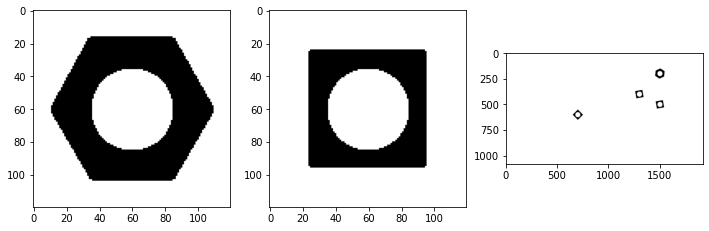

In [19]:

correctedImages =[]

fig, ax = plt.subplots(1,3, figsize = (12, 12))


for i in range(3):
    correctedImages.append(cv.morphologyEx(binarized[i], cv.MORPH_CLOSE, np.ones((3,3),np.uint8)))
    ax[i].imshow(cv.cvtColor(correctedImages[i], cv.COLOR_GRAY2RGB))

plt.show()

**Connected components analysis: apply the connectedComponentsWithStats function**

3 components are detected in hexnut_template
3 components are detected in squarenut_template
6 components are detected in conveyor_f100


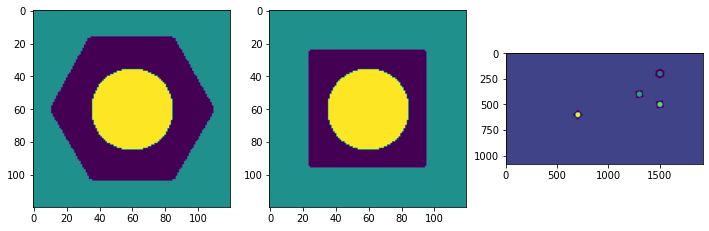

In [20]:
# Your code here.


numLabels,labels,stats,centroids = [],[],[],[]
connectivity = 4

fig, ax = plt.subplots(1, 3, figsize = (12,12))



for i in range(0, 3):
    connectedComponents = cv.connectedComponentsWithStats(correctedImages[i] , connectivity , cv.CV_32S)
    numLabels.append(connectedComponents[0])
    labels.append(connectedComponents[1])
    stats.append(connectedComponents[2])
    centroids.append(connectedComponents[3])

    print(numLabels[i] ,"components are detected in", image_names[i])
    ax[i].imshow(labels[i])
    
plt.show()

 #### *Statistics Interpretation*

Statistics matrix of hexnut_template image

$$\begin{bmatrix} 11  & 16  & 99 &  88 & 4730 \\ 0  &  0 & 120 & 120 & 7721 \\ 36  & 36 &  49 &  49 & 1949 \end{bmatrix}$$

Statistics matrix of squarenut_template image

$$\begin{bmatrix} 24 &  24 &  72  & 72  & 3239\\ 0  &  0 & 120 & 120 & 9220 \\ 36  & 36 &  49 &  49 & 1941 \end{bmatrix}$$

Statistics matrix of conveyor_f100 image

$$\begin{bmatrix} 651   &  151  &   895 &    499  & 14126 \\ 0    &   0  &  1920  &  1080 & 2051710  \\ 1476  &   176   &   49   &   49  &  1941 \\ 1276  &   376   &   49  &   49  &   1941 \\ 1476  &   476  &    49   &   49  &  1941 \\ 676  &   576  &    49    &  49   &  1941\end{bmatrix}$$

In the statistics matrix 5 th column of each row indicates the area of respective component. For the hexnut template image first row corresponds to the hex nut. It's 5 th column shows the area as  4730 pixels. That is approximately equal to 4728.

#### *Centroids*

Centroids matrix of hexnut_template image

$$\begin{bmatrix} 59.83403805 & 59.2243129 \\ 59.16914907 & 59.54267582\\ 60. &    60.       \end{bmatrix}$$

Centroids matrix of squarenut_template image

$$\begin{bmatrix} 59.20037048 & 59.20037048 \\ 59.5 &    59.5 \\ 60.   &     60. \end{bmatrix}$$

Centroids matrix of conveyor_f100 image

$$\begin{bmatrix} 1276.1564491  & 400.0198924 \\ 956.22052532 & 540.89360533 \\ 1500. &   200. \\ 1300.    &    400.\\ 1500.  &        500. \\ 700.     &     600. \end{bmatrix}$$

**Contour analysis: Use findContours function to retrieve the extreme outer contours.**

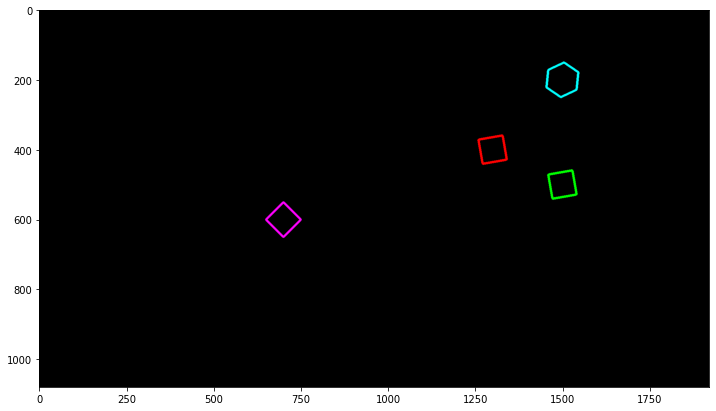

In [21]:


contours,hierarchy, contoursHexnut,contoursSquarenut,outerContours,inverted = [],[],[],[],[],[]

colors = [(255,0,255),(0,255,0),(255,0,0),(0,255,255)]


blackImg = cv.cvtColor((np.zeros((np.shape(images[2])[0],np.shape(images[2])[1] , 1), dtype = "uint8")),cv.COLOR_BGR2RGB)

for i in binarized:
    inverted.append(cv.bitwise_not(i))

for i in inverted:
    contours.append(cv.findContours(i, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0])
    hierarchy.append(cv.findContours(i, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[1])


for i in range(0, len(contours[0])):
    area = cv.contourArea(contours[0][i])
    if area > 6000:
        cv.drawContours(images[0], contours[0], i, colors[i], 2)
        contoursHexnut.append(contours[0][i])
for i in range(0, len(contours[1])):
    area = cv.contourArea(contours[1][i])
    if area > 5000:
        cv.drawContours(images[1], contours[1], i, colors[i], 2)
        contoursSquarenut.append(contours[1][i])
for i in range(0, len(contours[2])):
    area = cv.contourArea(contours[2][i])
    if area > 4000:  
        cv.drawContours(blackImg, contours[2], i, colors[i], 5)
        outerContours.append(contours[2][i])


fig, ax = plt.subplots(figsize = (12, 12))
ax.imshow(blackImg)
 
plt.show()

### Detecting Objects on a Synthetic Conveyor

In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.

1. **Open the sequence and play it using the code below.**

In [22]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()


Can't receive frame (stream end?). Exiting.


**Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function**

In [23]:
lst =[]

for i in outerContours:
    if (cv.matchShapes(contoursHexnut[0],i,1,0.0)) < 0.02:
        lst.append(cv.matchShapes(contoursHexnut[0],i,1,0.0))

print(len(lst),'matching hexagonal nuts in conveyor_f100.png')

1 matching hexagonal nuts in conveyor_f100.png


**Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames conveyor_f100.png and conveyor_f101.png. In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the matchCountours function.**


In [25]:
# Yor code here.
import cv2 as cv
def countFunc(frame, frameName):
    global total
    count = 0
    leftCenters,rightCenters,frameContours = [],[],[]


    grayImg = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    blurredImg = cv.GaussianBlur(grayImg, (5,5), 0)
    temp,thresh = cv.threshold(blurredImg, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU) 
    bitnotImg = cv.bitwise_not(thresh)
    contours, hierarchy = cv.findContours(bitnotImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    for i in range(0, len(contours)):
        area = cv.contourArea(contours[i])
        if area > 4500 and area < 7000 and (cv.matchShapes(contoursHexnut[0],contours[i],1,0.0) < 0.02 or cv.matchShapes(contoursSquarenut[0],contours[i],1,0.0) < 0.02):
            frameContours.append(contours[i])
    
    for i in range(len(frameContours)):
        M = cv.moments(frameContours[i])
        cx = int(M['m10']/M['m00'])
        if 1900 > cx > 10:
            cv.drawContours(frame, frameContours, i, (0, 255, 0), 4)
            count+= 1

        if (1000-cx) >= 0:
            leftCenters.append(cx)
        else:
            rightCenters.append(cx)
    for i in leftCenters:
        if 1000-i < 10:
            
            total+= 1
    
    text1 = 'Frame:' + str(frameName)
    text2 = 'Current count of objects:' + str(count)
    text3 = 'Total counts of objects:' + str(total)
    cv.putText(frame,text1 , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,text2 , (100, 130), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,text3 , (100, 160), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)

    return frame

# Writing the video

frame_array = []
shape = (1080, 1920, 3)

# Your code here
total = 0
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []
     
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    frame_array.append(countFunc(frame, f))

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

out = cv.VideoWriter('./conveyor_result_190660F.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
